Dataset datathon 2025
- Exploraracion de los datos
- Interpretación de los datos

In [7]:
import pandas as pd

diatomeas = pd.read_csv("01_DiatomInventories_GTstudentproject_B.csv")
sitios = pd.read_csv("02_InfoSites_GTstudentproject_B.csv")
test = pd.read_csv("03_IBD_GTstudentproject_test.csv")
train = pd.read_csv("03_IBD_GTstudentproject_train.csv")

In [8]:
diatomeas.head()

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


In [9]:
sitios.head()

,CodeSite_SamplingOperations,Longitude_Lambert93,Latitude_Lambert93,Watershed,CodeDepartement,HERlvl1Code,HERlvl1Name,HERlvl2Code,HERlvl2Name,Altitude,Streamsize
0,S02096750,993887.0,6875414.0,Rhin-Meuse,67,10,COTES CALCAIRES EST,25,Plateau lorrain,225.0,NaN
1,S05170800,596306.0,6214010.0,Adour-Garonne,09,14,COTEAUX AQUITAINS,68,Coteaux molassiques Est Aquitaine,424.0,TP
2,S05201050,371740.0,6264090.0,Adour-Garonne,64,14,COTEAUX AQUITAINS,77,Coteaux molassiques bassin de l'adour,25.0,P
3,S02067400,984385.0,6837446.0,Rhin-Meuse,54,10,COTES CALCAIRES EST,25,Plateau lorrain,260.0,M
4,S05023100,488324.0,6553060.0,Adour-Garonne,16,9,TABLES CALCAIRES,97,TC - Charentes Poitou,99.0,TP


In [10]:
train.head()

,SamplingOperations_code,IBD,IBD_EQR,IBD_EQR_Status
0,S04319000_20130724,5.2,0.256098,Bad
1,S06172100_20080716,6.1,0.298246,Bad
2,S03255920_20120802,3.7,0.157895,Bad
3,S04064720_20150710,4.9,0.228070,Bad
4,S05001500_20080726,5.3,0.251462,Bad


In [11]:
import seaborn as sb

<Axes: xlabel='IBD_EQR_Status', ylabel='count'>

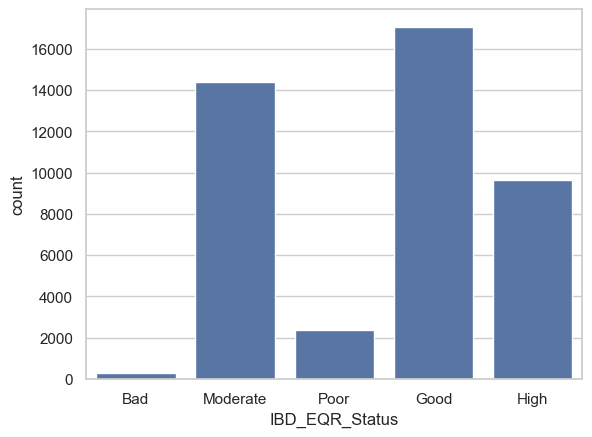

In [12]:
sb.countplot(
    x="IBD_EQR_Status",
    data=train
)

In [13]:
train["IBD_EQR_Status"].value_counts()

IBD_EQR_Status
Good        17061
Moderate    14396
High         9637
Poor         2383
Bad           306
Name: count, dtype: int64

Con la datos y la graficacion nos podemos dar cuenta de lo siguiente:
- Desvalance grave de datos finales (targets) en el caso de Bad.
- Lo cual es necesario usar tecnicas de pesos para reducir el desvalance.
- En caso de nuestro modelo uso de folds para mejorar el modelo.


In [14]:
diatomeas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 non-null  object 
 2   SamplingOperations_code           1643872 non-null  object 
 3   CodeSite_SamplingOperations       1643872 non-null  object 
 4   Date_SamplingOperation            1643872 non-null  object 
 5   Abundance_nbcell                  1643872 non-null  int64  
 6   TotalAbundance_SamplingOperation  1643872 non-null  int64  
 7   Abundance_pm                      1643872 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 100.3+ MB


array([[<Axes: title={'center': 'Abundance_nbcell'}>,
        <Axes: title={'center': 'TotalAbundance_SamplingOperation'}>],
       [<Axes: title={'center': 'Abundance_pm'}>, <Axes: >]], dtype=object)

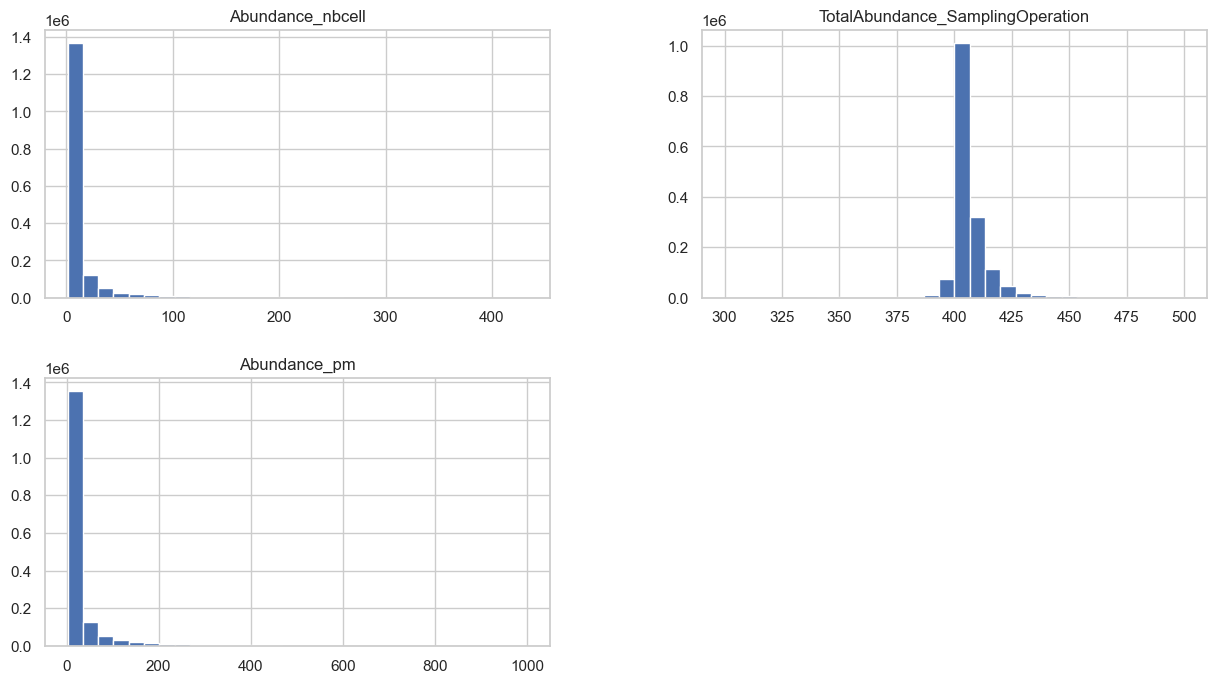

In [15]:
diatomeas.hist(figsize=(15,8), bins=30,)

In [16]:
sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8404 entries, 0 to 8403
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CodeSite_SamplingOperations  8404 non-null   object 
 1   Longitude_Lambert93          8404 non-null   float64
 2   Latitude_Lambert93           8404 non-null   float64
 3   Watershed                    8404 non-null   object 
 4   CodeDepartement              8404 non-null   object 
 5   HERlvl1Code                  8404 non-null   int64  
 6   HERlvl1Name                  8404 non-null   object 
 7   HERlvl2Code                  8404 non-null   int64  
 8   HERlvl2Name                  8404 non-null   object 
 9   Altitude                     8404 non-null   float64
 10  Streamsize                   8291 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 722.3+ KB


array([[<Axes: title={'center': 'Longitude_Lambert93'}>,
        <Axes: title={'center': 'Latitude_Lambert93'}>],
       [<Axes: title={'center': 'HERlvl1Code'}>,
        <Axes: title={'center': 'HERlvl2Code'}>],
       [<Axes: title={'center': 'Altitude'}>, <Axes: >]], dtype=object)

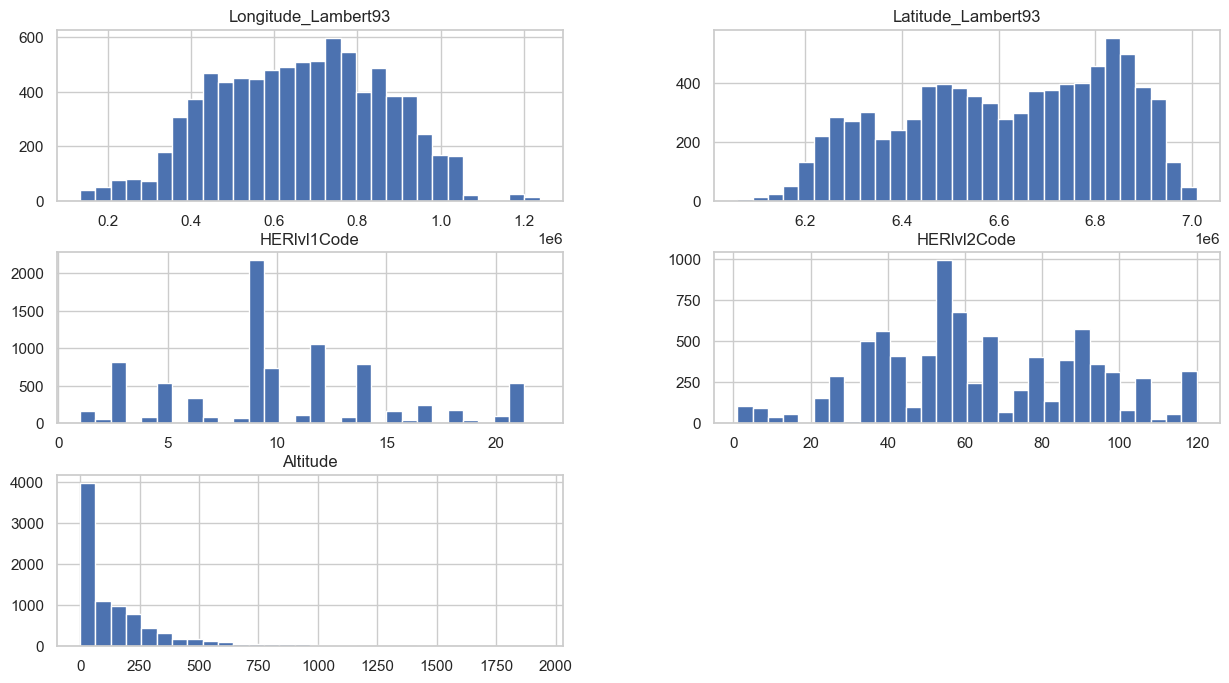

In [17]:
sitios.hist(figsize=(15,8), bins=30,)

Exploración basica de los algunos elementos del dataset

In [18]:
import matplotlib.pyplot as plt

<Axes: xlabel='Longitude_Lambert93', ylabel='Latitude_Lambert93'>

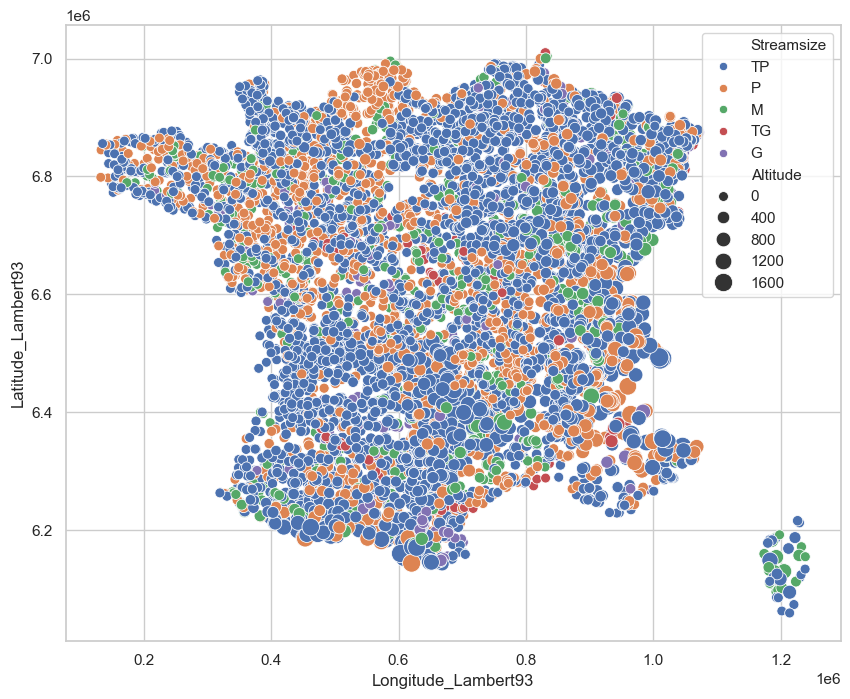

In [19]:
plt.figure(figsize=(10, 8))
sb.scatterplot(
    x="Longitude_Lambert93",
    y="Latitude_Lambert93",
    data=sitios,
    hue="Streamsize",
    size="Altitude",  
    sizes=(50, 200)   
)

Usando matplotlib la creacion de un mapa de los rios de franica en base a su tamaño y altitud

C:\Users\gerar\AppData\Local\Temp\ipykernel_8620\1109825787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IBD_EQR_Status', y='IBD', data=train, order=ordenClases, palette='viridis')
C:\Users\gerar\AppData\Local\Temp\ipykernel_8620\1109825787.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IBD_EQR_Status', y='IBD_EQR', data=train, order=ordenClases, palette='magma')


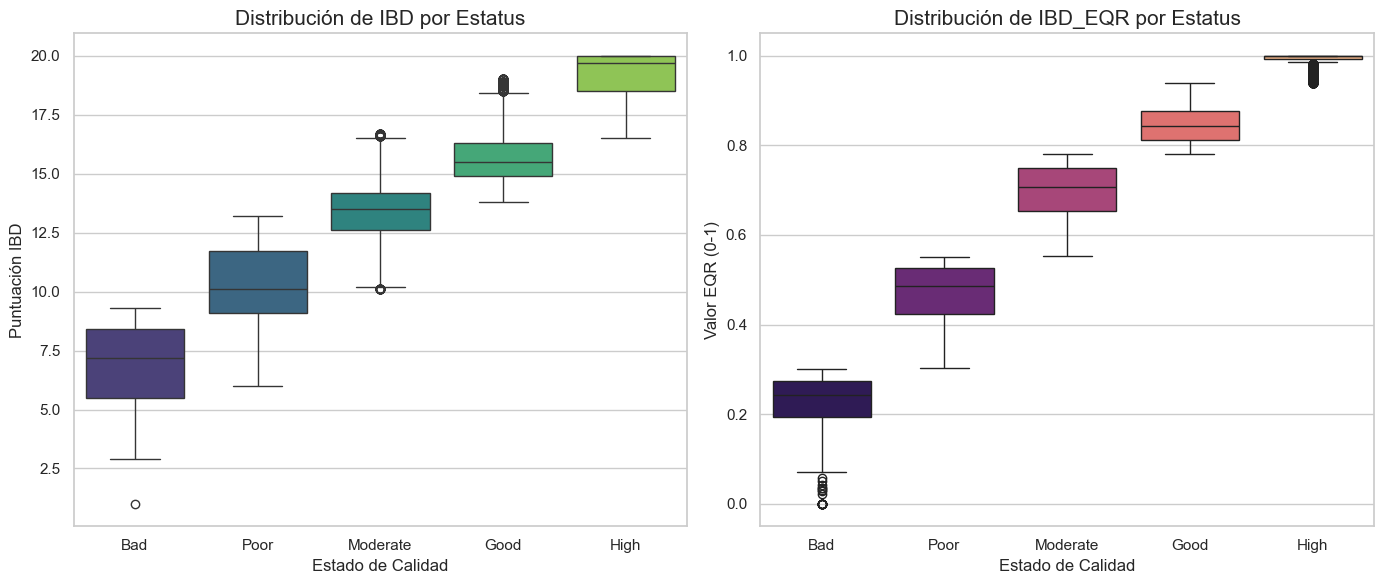

In [ ]:

import seaborn as sns

ordenClases = ['Bad', 'Poor', 'Moderate', 'Good', 'High']

plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")


plt.subplot(1, 2, 1)
sns.boxplot(x='IBD_EQR_Status', y='IBD', data=train, order=ordenClases, palette='viridis')
plt.title('Distribución de IBD por Estatus', fontsize=15)
plt.xlabel('Estado de Calidad', fontsize=12)
plt.ylabel('Puntuación IBD', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x='IBD_EQR_Status', y='IBD_EQR', data=train, order=ordenClases, palette='magma')
plt.title('Distribución de IBD_EQR por Estatus', fontsize=15)
plt.xlabel('Estado de Calidad', fontsize=12)
plt.ylabel('Valor EQR (0-1)', fontsize=12)

plt.tight_layout()
plt.show()



Por ultimo como variable para nuestra primera predicción usaremos el ibd_qr por que es mucho mas claro los fronteras entre clases 